<a href="https://colab.research.google.com/github/Naseem-Ananzeh/Ml2_Final_Project/blob/main/Final_Project_ML2_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANT FOR TEAM
---
Kaggle Summary – Credit Card Fraud Detection Dataset

* Instances: 284,807 transactions

* Features: 30 total (28 PCA features + Time, Amount)

* Target: Class (1 = Fraud, 0 = Not Fraud)

* Data Type: All numerical

* Fraud Rate: 0.172% (492 frauds)

#**Libraries**



In [159]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#**Loading The Data**

In [160]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "creditcard.csv"

C_card = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path)

<ipython-input-160-71c1936db49a>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  C_card = kagglehub.load_dataset(


##**Dataset Understanding**

In [161]:
#Data types overview
C_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [162]:
C_card.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


 **Note**  :  ***V1 - V28***  are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

#**Data preprocessing and feature engineering**

In [163]:
C_card.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [164]:
#split the data
x = C_card.drop(['Class'], axis=1)
y = C_card['Class']

**The Histogram** shows 25 histograms for variables V1 to V28 and Amount, indicating mostly non-normal distributions with varying skewness.

---



In [165]:
x['Hour'] = (x['Time'] // 3600) % 24
median_amount = x['Amount'].median()
x['Amount_vs_Median'] = x['Amount'] / median_amount
# Note: This feature captures how much a transaction amount deviates from the median.
# It helps identify transactions that are unusually high or low compared to typical values,
# which can be useful for detecting anomalies like fraud.

In [166]:
x=x.drop(['Time'],axis=1)

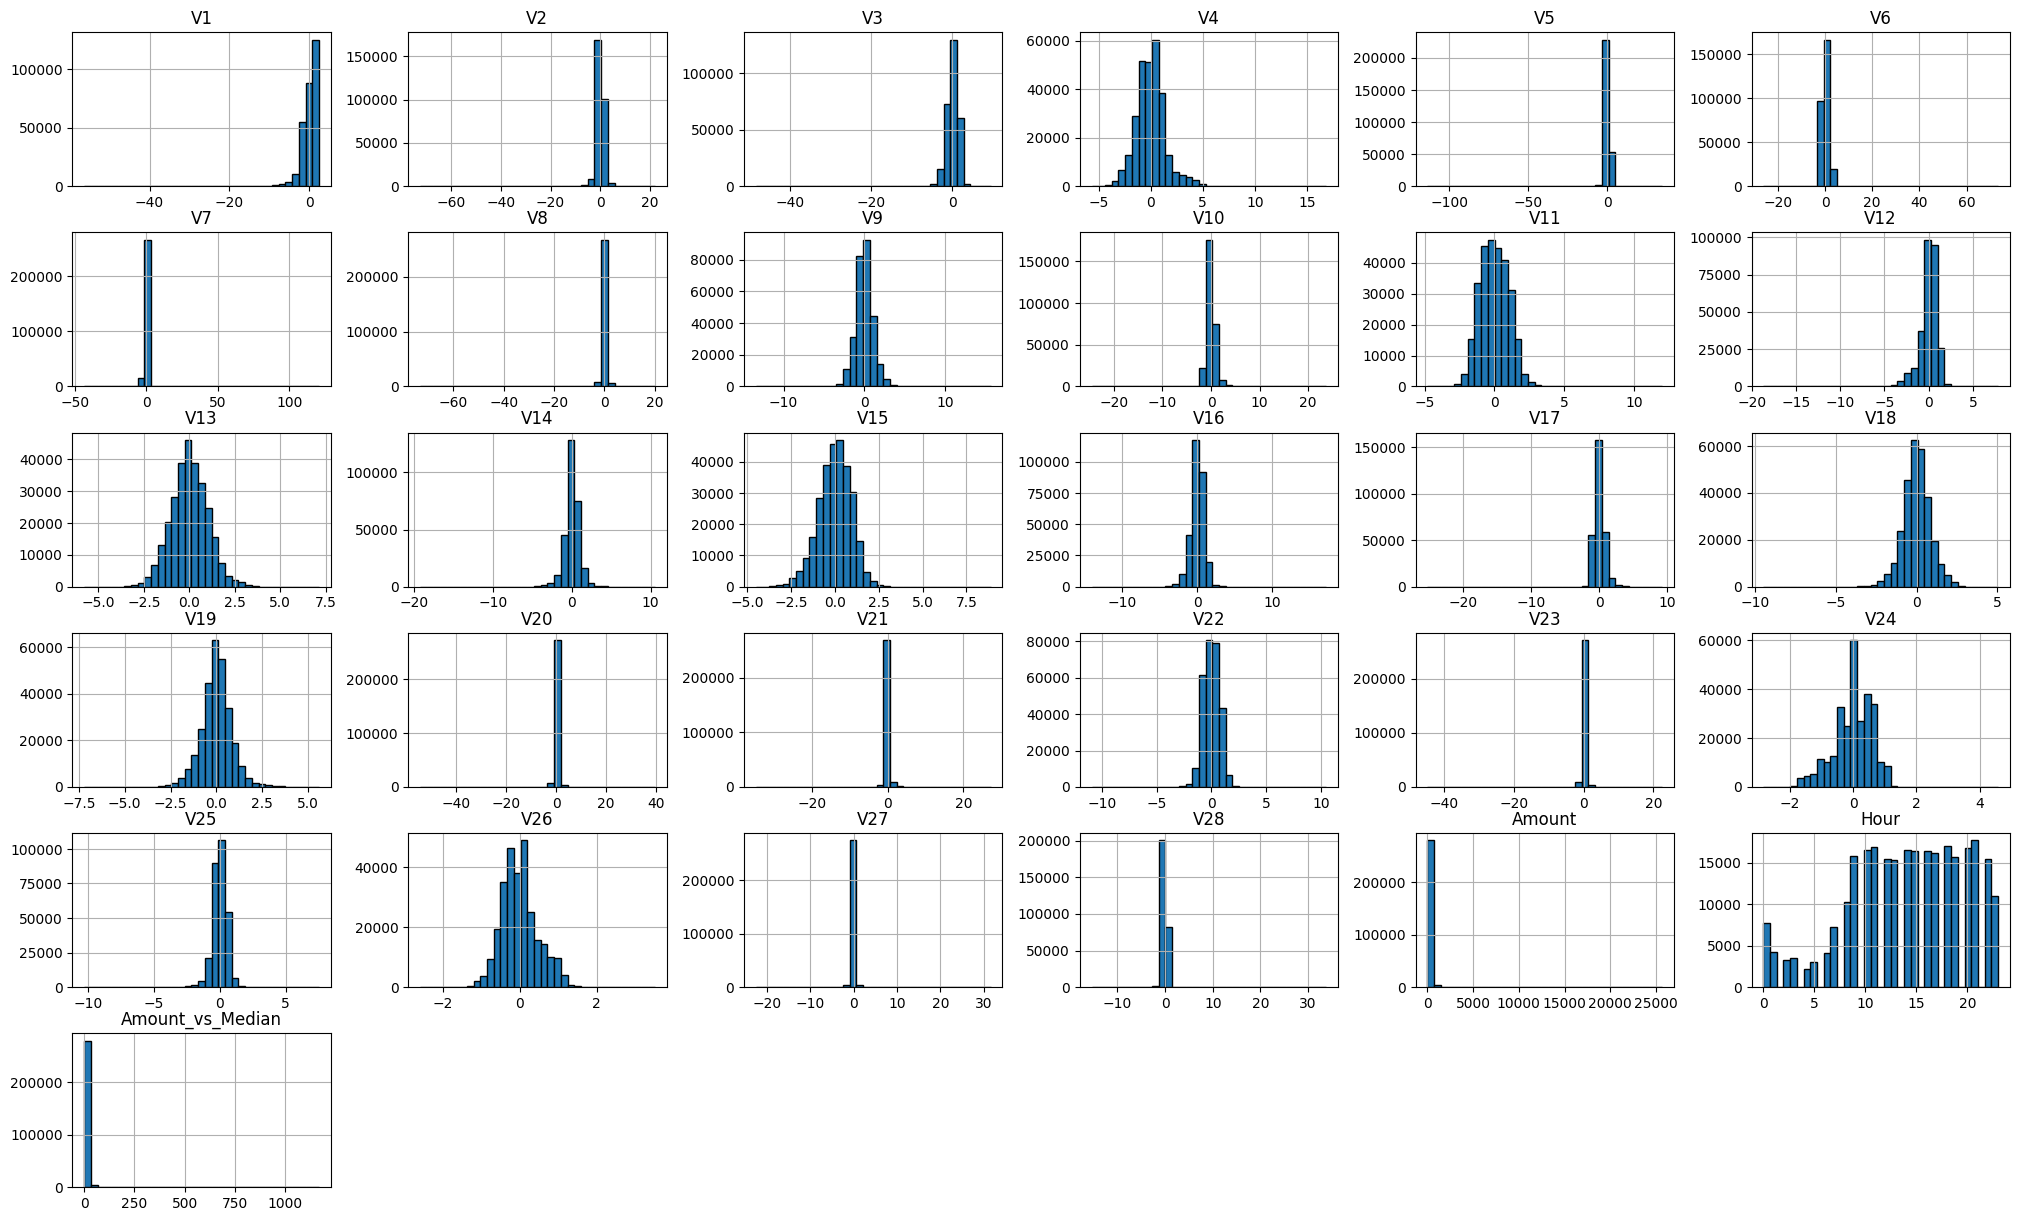

In [167]:
#Visualize feature distribution

x.hist(figsize=(25, 15), bins=35, edgecolor='black')
plt.show()

In [168]:
col = ["V1", "V2",'V3','V5', "V6", "V7","V8","V10", "V11", "V15", "V16", "V17", "V21", "V23", "V25", "V27", "V28", "Amount","Amount_vs_Median","Hour"]

from sklearn.preprocessing import QuantileTransformer           # Note: QuantileTransformer changes the distribution of the data
qt = QuantileTransformer(output_distribution='normal')          # to be more Gaussian-like (or uniform), but it preserves the ordinal
x[col] = qt.fit_transform(x[col])

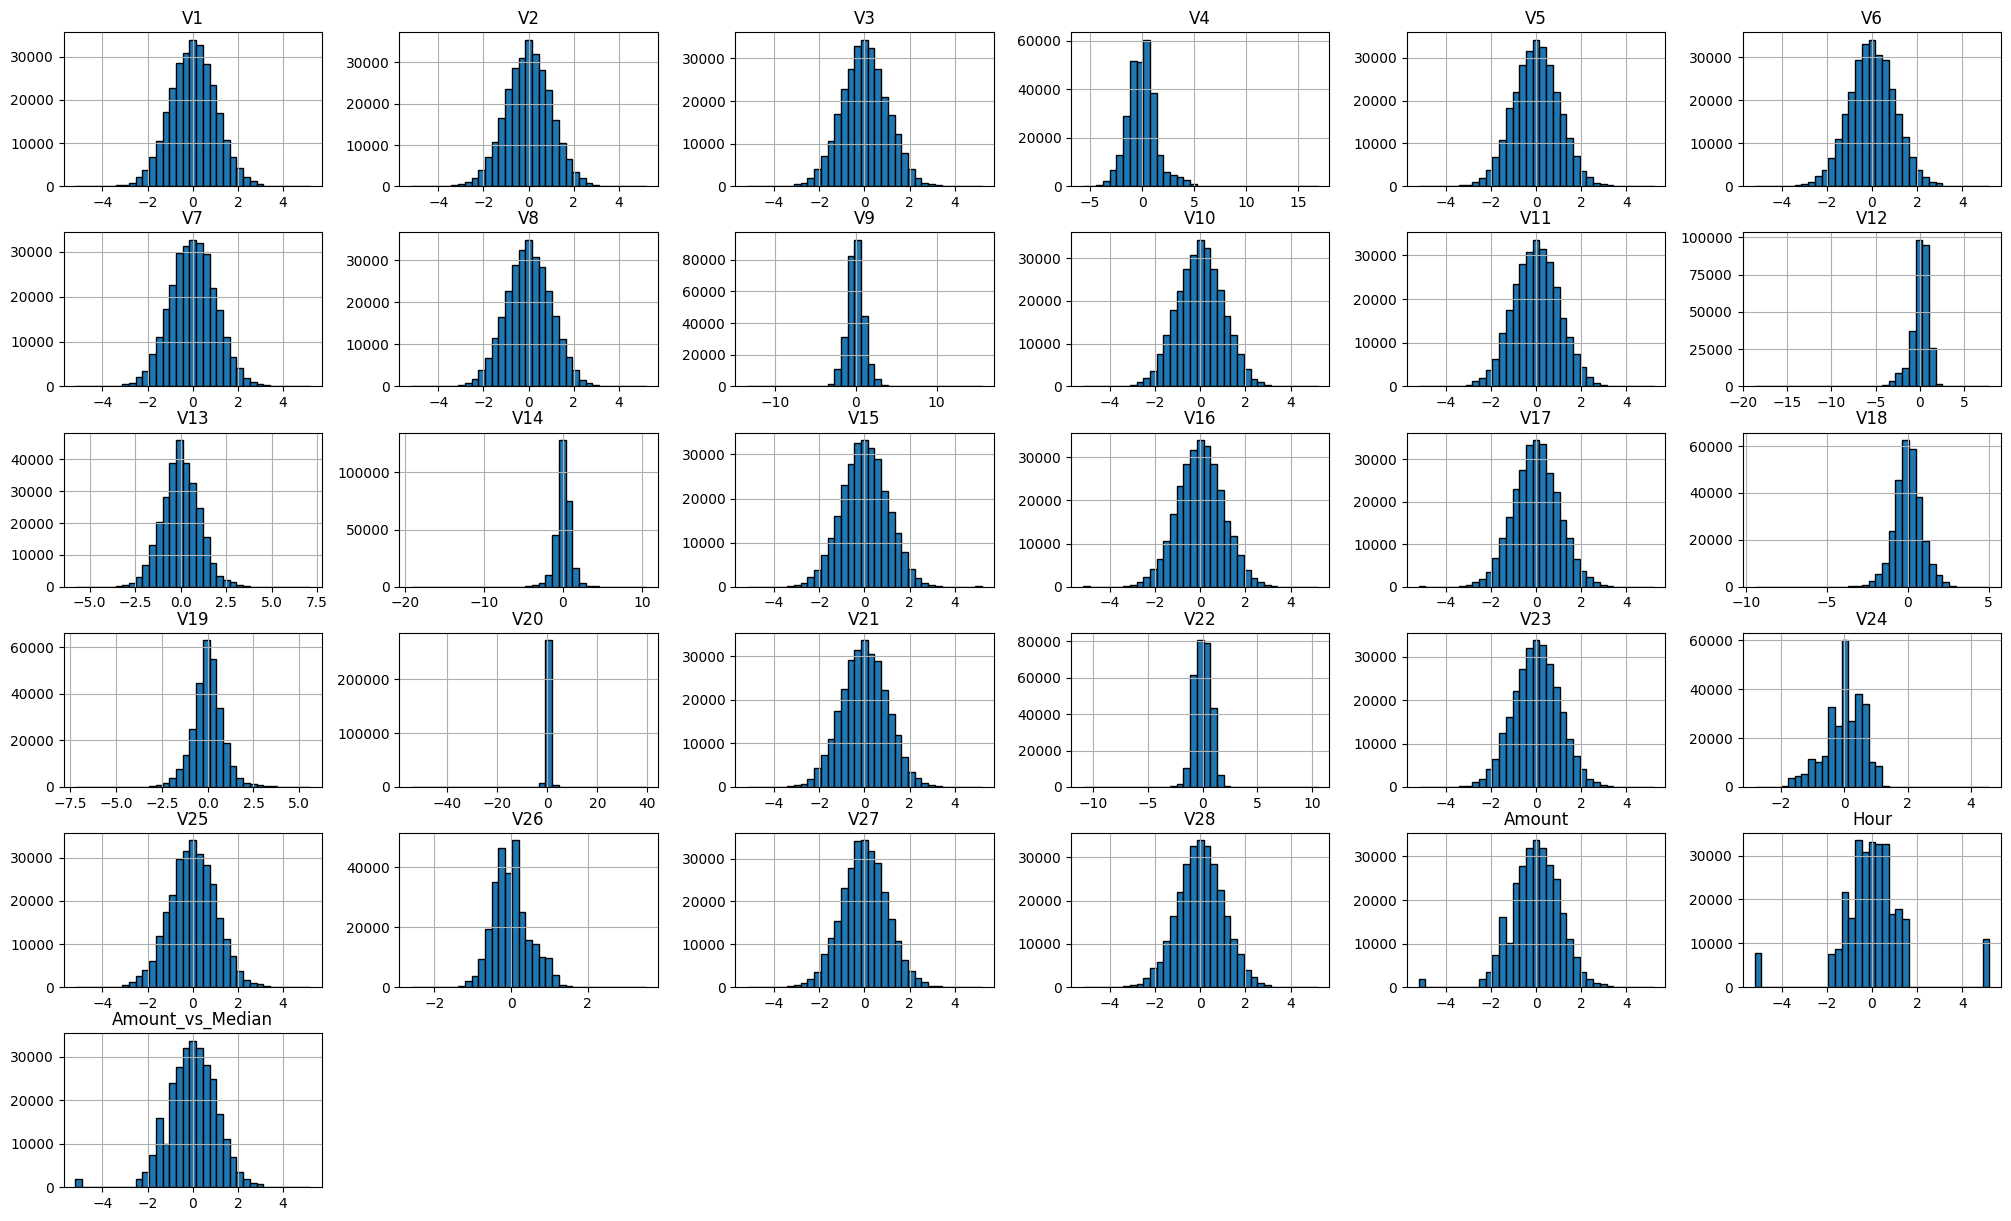

In [169]:
#Visualize feature distribution
x.hist(figsize=(25, 15), bins=35, edgecolor='black')
plt.show()

In [170]:
# We applied a scaler to the new features because the V1–V28 features was already scaled by the  PCA from the original data .
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[["Amount","Hour","Amount_vs_Median"]] = scaler.fit_transform(x[["Amount","Hour","Amount_vs_Median"]])
x_scaled=pd.DataFrame(x,columns=x.columns)

In [171]:
correlation_matrix=x_scaled.corr().round(6)

**Heatmap for the correlation between matricies**

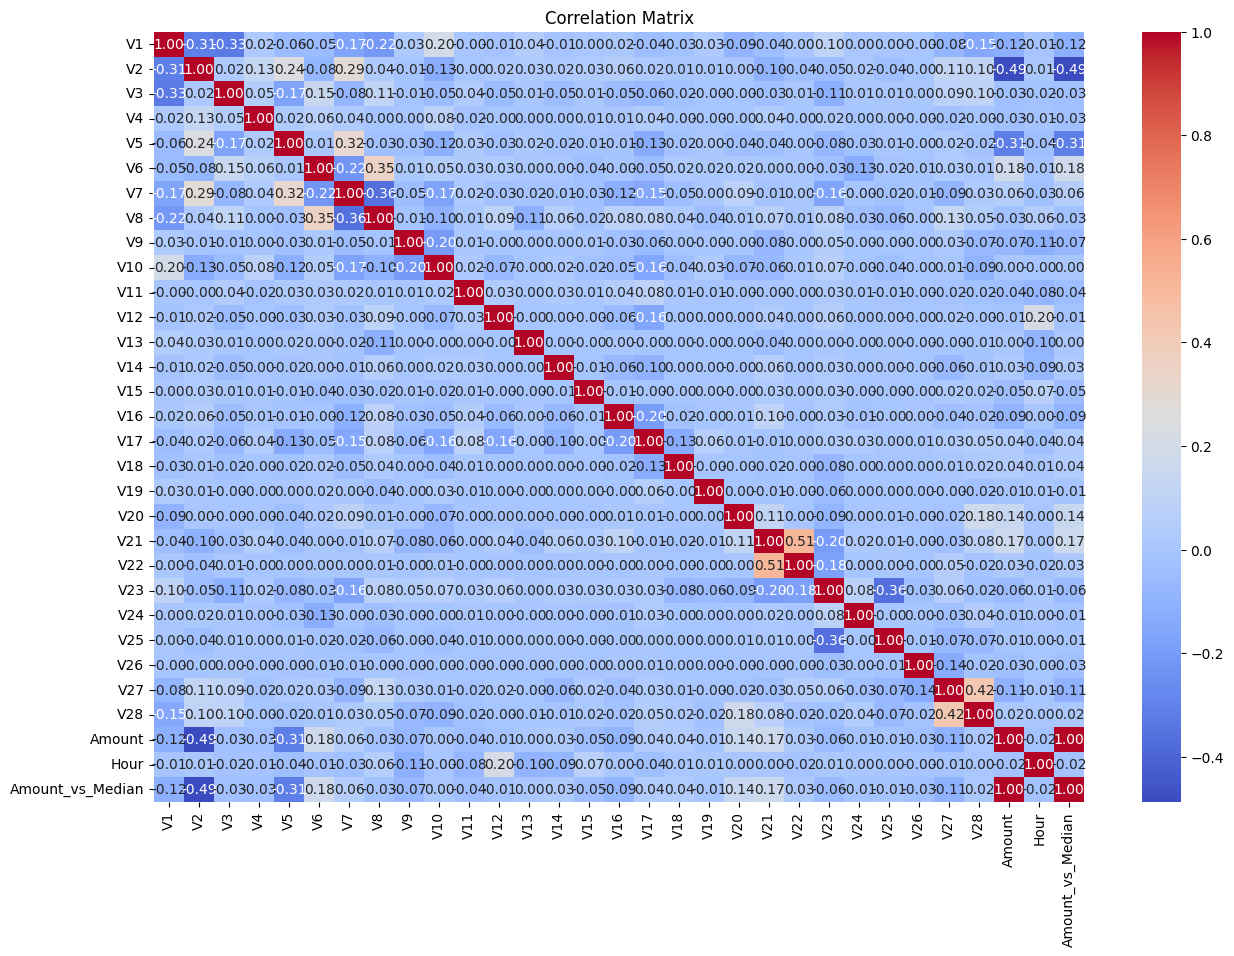

In [172]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#Dimensionality reduction (PCA, t-SNE)

In [173]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
x_pca = pca.fit_transform(x_scaled)

In [174]:
# Analyze explained variance
explained_variance = pca.explained_variance_ratio_.round(3)
explained_variance

array([0.092, 0.07 , 0.065, 0.064, 0.05 , 0.048, 0.045, 0.043, 0.042,
       0.04 , 0.037, 0.036, 0.034, 0.034, 0.033, 0.031, 0.025, 0.025,
       0.024, 0.023, 0.022, 0.019, 0.017, 0.016, 0.015, 0.012, 0.011,
       0.01 , 0.009, 0.008, 0.   ])

 The first principal component explains the largest amount of variance. This means most of the important information in the data is captured by the first component. The remaining components explain less variance.

---

**explained variance**  --> It helps determining how many principal components needed to retain in order to preserve most of the information from the original dataset, while reducing the dimensionality without significant loss of important data.



In [175]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"the minimum number of components preserving 90–95% variance: {n_components}")

pca_reduced = PCA(n_components=n_components)
x_pca_reduced = pca_reduced.fit_transform(x_scaled)

the minimum number of components preserving 90–95% variance: 25


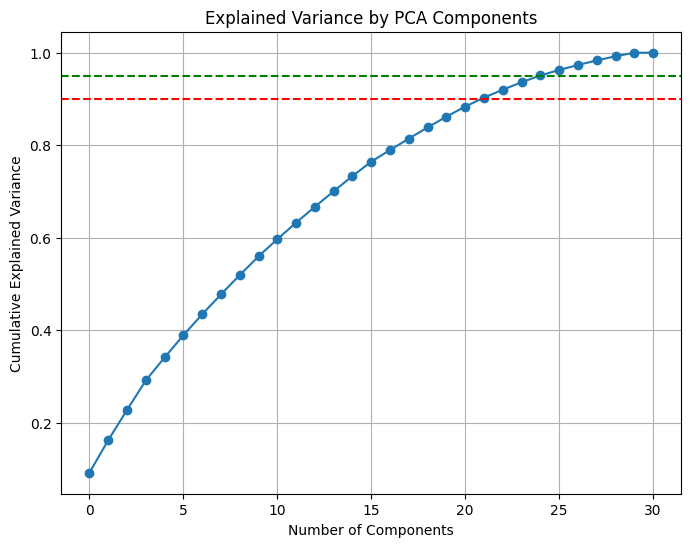

In [176]:
# cv = cumulative_variance
cv = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(cv, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.show()

To preserve 90-95 % of the total variance in the dataset, 25 principal components are required. This indicates that the original high-dimensional data can be reduced to just 26 components while still retaining most of its essential information and structure.

---





In [177]:
pca_reduced = PCA(n_components=n_components,random_state=42)
x_pca_reduced = pca_reduced.fit_transform(x_scaled)
x_pca_reduced.shape

(284807, 25)

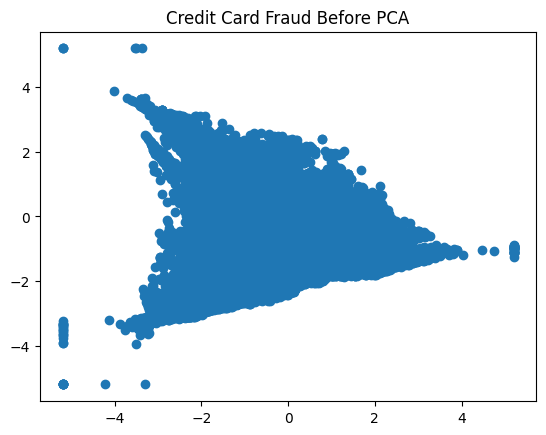

In [178]:
plt.scatter(x_scaled.iloc[:, 0], x_scaled.iloc[:, 1])
plt.title('Credit Card Fraud Before PCA')
plt.show()

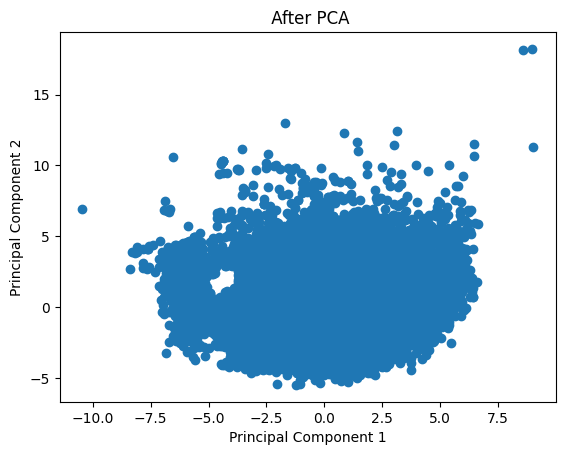

In [179]:
plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(' After PCA')
plt.show()

**Note: The scatter plot displays the data after applying PCA, projected onto the first two principal components. The points appear mostly as a dense cloud with some overlap, suggesting no clear clusters yet. However, a few outlier points are visible, which may represent anomalies.**

##TSNE

**Visualize clusters formed after PCA.**

In [180]:
from cuml.manifold import TSNE

tsne = TSNE(n_components=2,random_state=42)
x_tsne = tsne.fit_transform(x_pca_reduced)

/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


[2025-05-19 17:40:22.691] [CUML] [warning] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


**2D t-SNE plot before clustering**

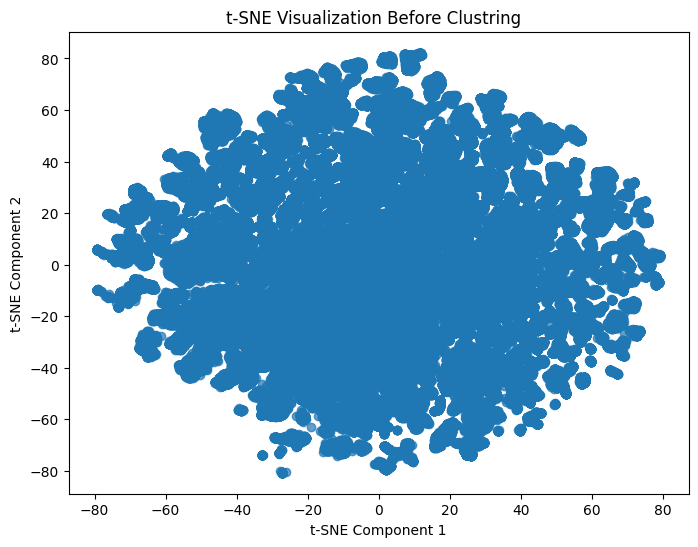

In [181]:
plt.figure(figsize=(8,6))
plt.scatter(x_tsne[:,0], x_tsne[:,1]  ,alpha=0.7)
plt.title('t-SNE Visualization Before Clustring  ')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

**2D t-SNE plot after clustering**

In [182]:
from sklearn.cluster import KMeans
kmeans_standerd = KMeans(n_clusters=14,init='random',  random_state=42)
clusters = kmeans_standerd.fit_predict(x_pca_reduced)

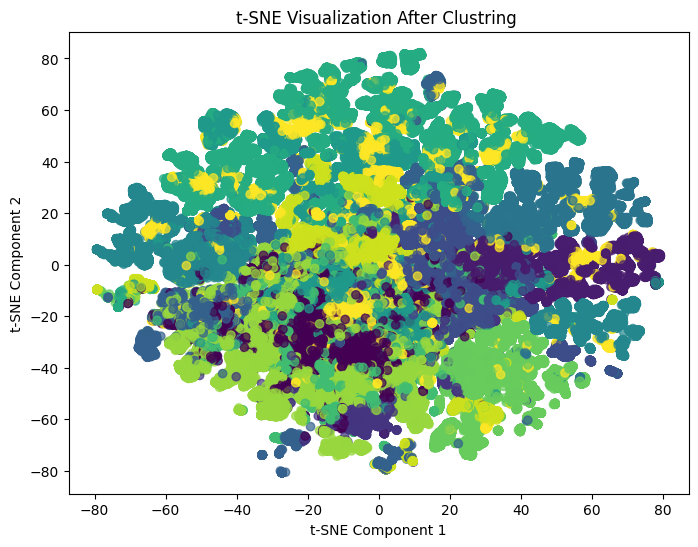

In [183]:
plt.figure(figsize=(8,6))
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=clusters , alpha=0.7)
plt.title('t-SNE Visualization After Clustring ')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

**According to the T-SNE PLOT it's keeping similar data points close together in the reduced space by maintaining small pairwise distances.**

# Clustering

**Plot Inertia vs k and Silhouette score vs k.**

In [184]:
x_pca_reduced_sample = x_pca_reduced[:1000]

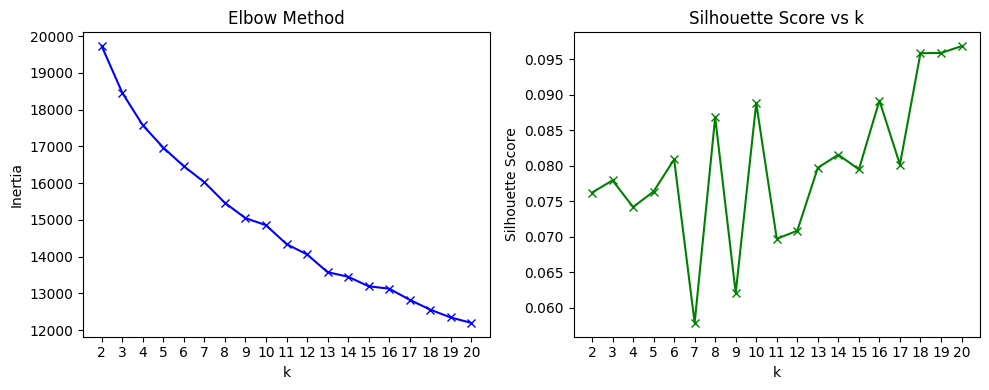

According to the silhouette score the best k is 20 with score 0.0969


In [185]:

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

inertias = []
silhouette_scores = []
kmeans_per_k = {}

K = range(2, 21)
for k in K:
    kmeans1 = KMeans(n_clusters=k,init='random', random_state=42)
    kmeans1.fit(x_pca_reduced_sample)
    kmeans_per_k[k] = kmeans1
    inertias.append(kmeans1.inertia_)
    score = silhouette_score(x_pca_reduced_sample, kmeans1.labels_)
    silhouette_scores.append(score)

# Elbow plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(K)

# Silhouette plot
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'gx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.xticks(K)
plt.tight_layout()
plt.show()

best_k_index = np.argmax(silhouette_scores)
best_k_value = K[best_k_index]
best_silhouette_score = silhouette_scores[best_k_index]

print(f'According to the silhouette score the best k is {best_k_value} with score {best_silhouette_score:.4f}')

In [186]:
kmeans_standerd = KMeans(n_clusters=14,init="random" , random_state=42).fit(x_pca_reduced_sample)
clusters1 = kmeans_standerd.fit_predict(x_pca_reduced_sample)

**Visualizing Silhouette Scores for K-Means Clustering**

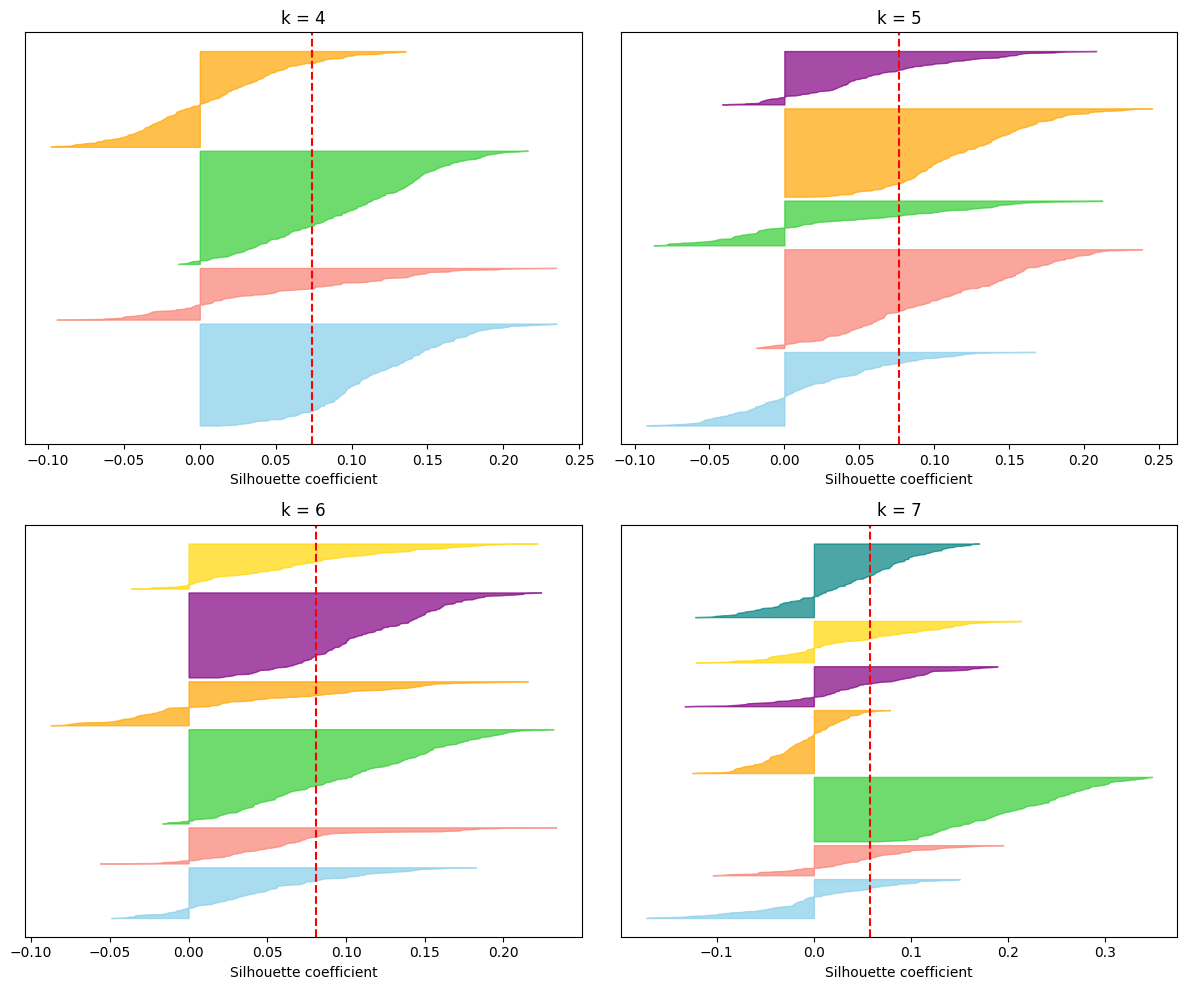

In [187]:
ks = [4,5 , 6, 7]

colors = ['skyblue', 'salmon', 'limegreen', 'orange', 'purple', 'gold', 'teal']

plt.figure(figsize=(12, 10))

for id, k in enumerate(ks, 1):
    labels   = KMeans(n_clusters=k, init = 'random', random_state=42).fit_predict(x_pca_reduced_sample)
    sil_vals = silhouette_samples(x_pca_reduced_sample, labels)

    plt.subplot(2, 2, id)
    y_lower = 10
    for i in range(k):
        cluster_vals = np.sort(sil_vals[labels == i])
        size = len(cluster_vals)
        y_upper = y_lower + size
        color = colors[i % len(colors)]
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, cluster_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10

    plt.axvline(sil_vals.mean(), color='red', linestyle='--')
    plt.title(f"k = {k}")
    plt.yticks([])
    plt.xlabel("Silhouette coefficient")

plt.tight_layout()
plt.show()

##kmeans ++

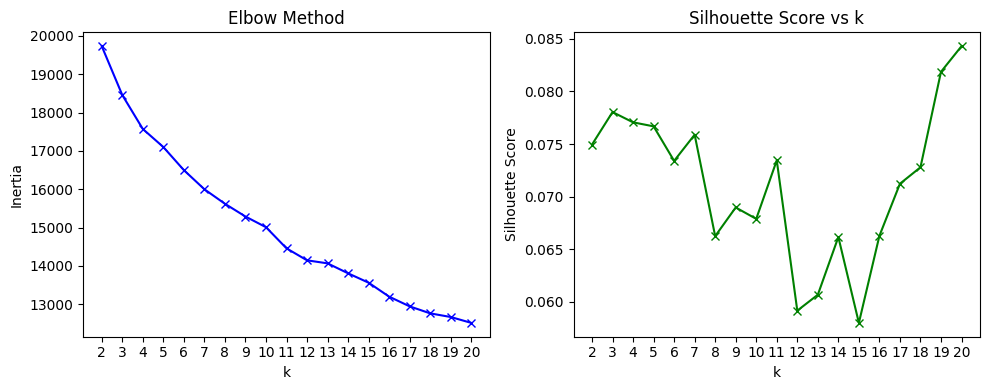

According to the silhouette score the best k is 20 with score 0.0843


In [188]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

inertias = []
silhouette_scores = []
kmeans_per_k = {}

K = range(2, 21)
for k in K:
    kmeans1 = KMeans(n_clusters=k, random_state=42)
    kmeans1.fit(x_pca_reduced_sample)
    kmeans_per_k[k] = kmeans1
    inertias.append(kmeans1.inertia_)
    score = silhouette_score(x_pca_reduced_sample, kmeans1.labels_)
    silhouette_scores.append(score)

# Elbow plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(K)

# Silhouette plot
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'gx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.xticks(K)
plt.tight_layout()
plt.show()

best_k_index = np.argmax(silhouette_scores)
best_k_value = K[best_k_index]
best_silhouette_score = silhouette_scores[best_k_index]

print(f'According to the silhouette score the best k is {best_k_value} with score {best_silhouette_score:.4f}')

In [189]:
kmeans_p = KMeans(n_clusters=5,init="k-means++" , random_state=42).fit(x_pca_reduced_sample)
clusters1 = kmeans_p.fit_predict(x_pca_reduced_sample)

**Show how initialization impacts convergence and results**

In [190]:
#1
print("K-Means Iterations:", kmeans_standerd.n_iter_)
print("K-Means++ Iterations:", kmeans_p.n_iter_)
print("------------------------------------------------------------")

#2
print("K-Means Silhouette Score:", silhouette_score(x_pca_reduced_sample, kmeans_standerd.labels_))
print("K-Means++ Silhouette Score:", silhouette_score(x_pca_reduced_sample, kmeans_p.labels_))

K-Means Iterations: 18
K-Means++ Iterations: 14
------------------------------------------------------------
K-Means Silhouette Score: 0.08157600017876451
K-Means++ Silhouette Score: 0.07668058300496391


**Compare standard K-Means standard and K-Means++.**

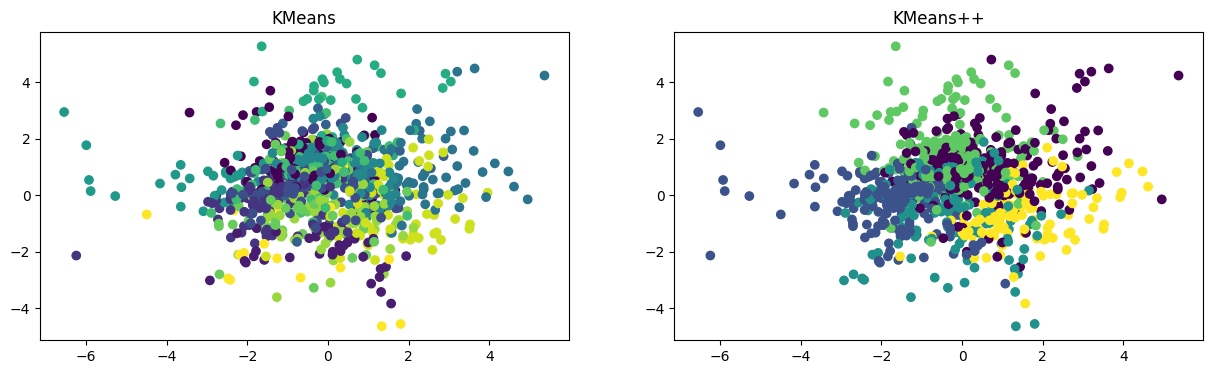

In [191]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
axs[0].scatter(x_pca_reduced_sample[:, 0], x_pca_reduced_sample[:, 1], c=kmeans_standerd.labels_)
axs[0].set_title("KMeans")
axs[1].scatter(x_pca_reduced_sample[:, 0], x_pca_reduced_sample[:, 1], c=kmeans_p.labels_)
axs[1].set_title("KMeans++")
plt.show()

##MiniBatchKMeans

In [192]:
from sklearn.cluster import MiniBatchKMeans

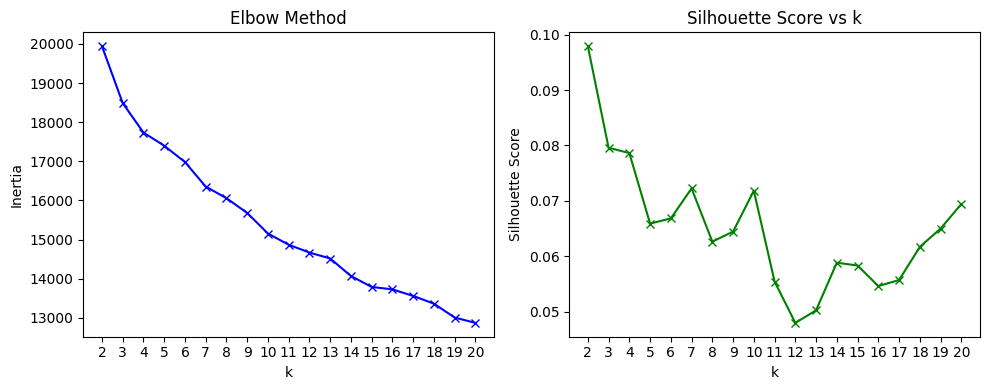

According to the silhouette score the best k is 2 with score 0.0979


In [193]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

inertias = []
silhouette_scores = []
kmeans_per_k = {}

K = range(2, 21)

for k in K:
    minikeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    minikeans.fit(x_pca_reduced_sample)
    kmeans_per_k[k] = minikeans
    inertias.append(minikeans.inertia_)
    score = silhouette_score(x_pca_reduced_sample, minikeans.labels_)
    silhouette_scores.append(score)

# Elbow plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(K)

# Silhouette plot
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'gx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.xticks(K)
plt.tight_layout()
plt.show()

best_k_index = np.argmax(silhouette_scores)
best_k_value = K[best_k_index]
best_silhouette_score = silhouette_scores[best_k_index]

print(f'According to the silhouette score the best k is {best_k_value} with score {best_silhouette_score:.4f}')

In [194]:
minikmeans=MiniBatchKMeans(n_clusters=2, random_state=42)
minikmeans.fit(x_pca_reduced_sample)

MiniBatchKMeans(n_clusters=2, random_state=42)

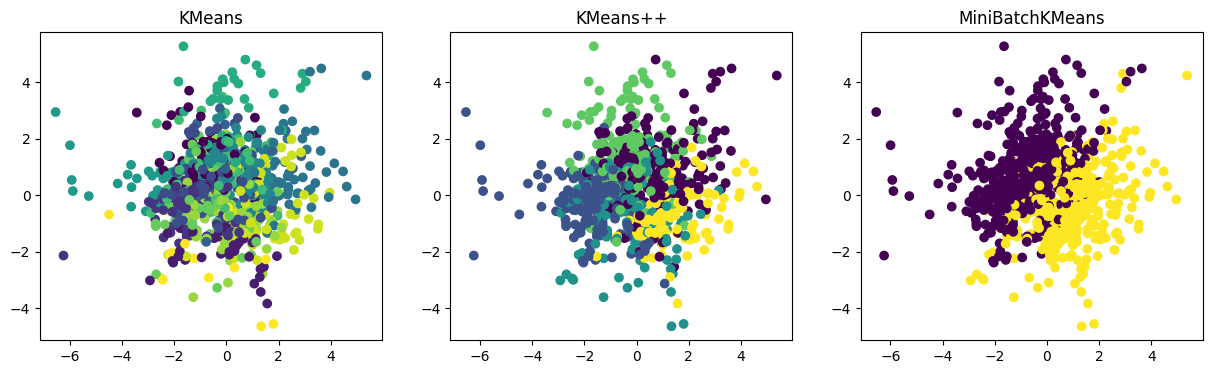

In [195]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].scatter(x_pca_reduced_sample[:, 0], x_pca_reduced_sample[:, 1], c=kmeans_standerd.labels_)
axs[0].set_title("KMeans")
axs[1].scatter(x_pca_reduced_sample[:, 0], x_pca_reduced_sample[:, 1], c=kmeans_p.labels_)
axs[1].set_title("KMeans++")
axs[2].scatter(x_pca_reduced_sample[:, 0], x_pca_reduced_sample[:, 1], c=minikmeans.labels_)
axs[2].set_title("MiniBatchKMeans")
plt.show()

/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


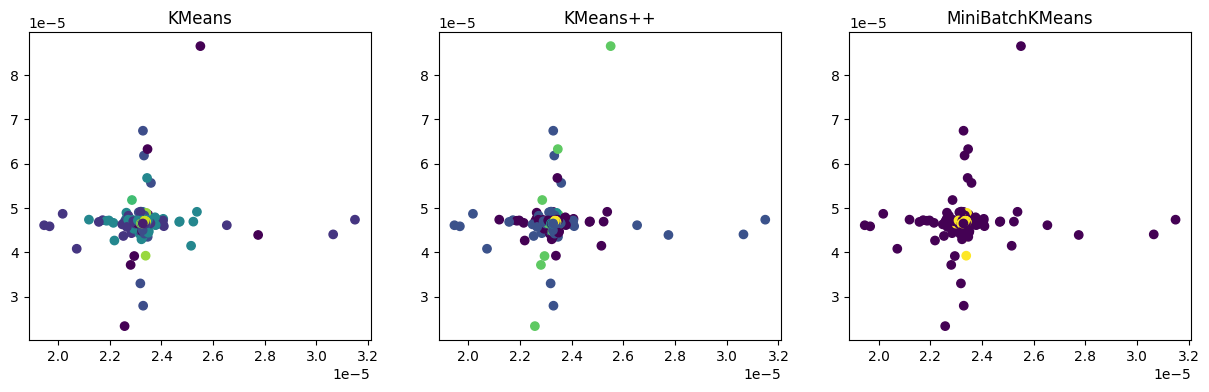

In [196]:
x_tsne = TSNE(random_state=42).fit_transform(x_pca_reduced_sample)
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].scatter(x_tsne[:, 0], x_tsne[:, 1], c=kmeans_standerd.labels_)
axs[0].set_title("KMeans")
axs[1].scatter(x_tsne[:, 0], x_tsne[:, 1], c=kmeans_p.labels_)
axs[1].set_title("KMeans++")
axs[2].scatter(x_tsne[:, 0], x_tsne[:, 1], c=minikmeans.labels_)
axs[2].set_title("MiniBatchKMeans")
plt.show()

**Compare speed, memory usage, and accuracy with standard K-Means.**

In [197]:
!pip install memory_profiler

In [198]:
import time
start_time = time.time()
minikmeans=MiniBatchKMeans(n_clusters=6, random_state=42)
minikmeans.fit(x_pca_reduced_sample)
end_time = time.time()
mini_batch_cluster_labels = minikmeans.labels_
mini_batch_time = end_time-start_time

mini_batch_silhouette = silhouette_score(x_pca_reduced_sample, mini_batch_cluster_labels)

print("Mini-Batch K-Means:")
print(f"  Time taken: {mini_batch_time:.4f} seconds")
print(f"  Silhouette Score: {mini_batch_silhouette}")


start_time = time.time()
kmeans = KMeans(n_clusters=13, init = 'random' , random_state=42)
kmeans.fit(x_pca_reduced_sample)
end_time = time.time()
kmeans_time = end_time - start_time

kmeans_silhouette = silhouette_score(x_pca_reduced_sample, kmeans.labels_)

print("\nStandard K-Means:")
print(f"  Time taken: {kmeans_time:.4f} seconds")
print(f"  Silhouette Score: {kmeans_silhouette}")


print("\nComparison:")
print(f"  Time difference: {abs(mini_batch_time - kmeans_time):.4f} seconds")
print(f"  Silhouette difference: {abs(mini_batch_silhouette - kmeans_silhouette):.4f}")


Mini-Batch K-Means:
  Time taken: 0.0089 seconds
  Silhouette Score: 0.06682544094126786

Standard K-Means:
  Time taken: 0.0448 seconds
  Silhouette Score: 0.07973188266295171

Comparison:
  Time difference: 0.0359 seconds
  Silhouette difference: 0.0129


In [199]:
from memory_profiler import memory_usage

def kmeans():
    kmeans = KMeans(n_clusters=13 , random_state=42)
    kmeans.fit(x_pca_reduced_sample)

def kmeans_minibatch():
    minikmeans=MiniBatchKMeans(n_clusters=6, random_state=42)
    minikmeans.fit(x_pca_reduced_sample)

mem_standerd = memory_usage(kmeans)
mem_mini = memory_usage(kmeans_minibatch)

print("standerd Memory Usage:", max(mem_standerd), "MiB")
print("mini_batch  Memory Usage:", max(mem_mini), "MiB")

standerd Memory Usage: 2107.05078125 MiB
mini_batch  Memory Usage: 2107.05078125 MiB


 **Note:**

1.   The memory usage appears similar for both KMeans and MiniBatchKMeans.



2.   This is likely because the dataset is relatively small




3.   MiniBatchKMeans shows clear memory and speed advantages mainly with large-scale data.



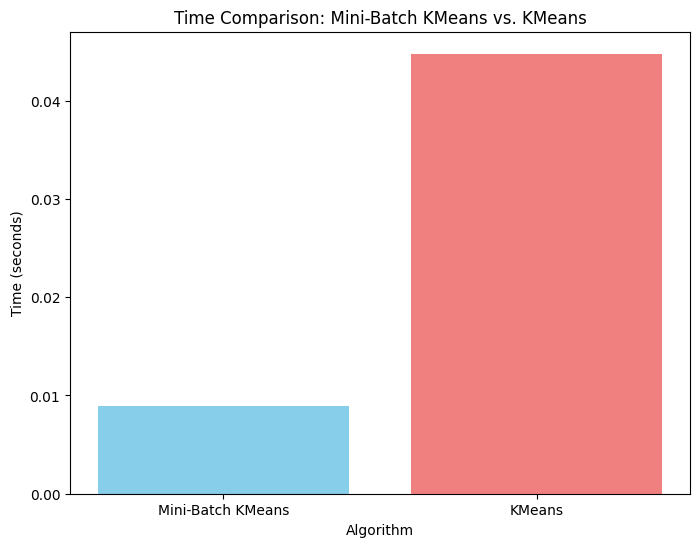

In [200]:
algorithms = ['Mini-Batch KMeans', 'KMeans']
times = [mini_batch_time, kmeans_time]

plt.figure(figsize=(8, 6))
plt.bar(algorithms, times, color=['skyblue', 'lightcoral'])
plt.xlabel('Algorithm')
plt.ylabel('Time (seconds)')
plt.title('Time Comparison: Mini-Batch KMeans vs. KMeans')
plt.show()

##DBSCAN

In [201]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN( algorithm='kd_tree')
labels = dbscan.fit_predict(x_pca_reduced_sample)
label_counts = pd.Series(labels).value_counts().sort_index()

print(label_counts)

-1    1000
Name: count, dtype: int64


In [202]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN

def silhouette_dbscan_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters <= 1:
        return -1
    return silhouette_score(X, labels)

dbscan_param_grid = {
    'eps': [5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10],
    'min_samples': [15, 20, 25, 30, 35, 40, 45, 50]
}

grid_search = GridSearchCV(
    estimator=DBSCAN(),
    param_grid=dbscan_param_grid,
    scoring=silhouette_dbscan_scorer,
    cv=[(np.arange(len(x_pca_reduced_sample)), np.arange(len(x_pca_reduced_sample)))],
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_pca_reduced_sample)

print(" Best parameters found:", grid_search.best_params_)

Fitting 1 folds for each of 88 candidates, totalling 88 fits
 Best parameters found: {'eps': 5, 'min_samples': 15}


In [203]:
best_dbscan = DBSCAN(eps=5, min_samples=15)
labels = best_dbscan.fit_predict(x_pca_reduced_sample)
label_counts = pd.Series(labels).value_counts().sort_index()
print(label_counts)

-1     51
 0    949
Name: count, dtype: int64


In [204]:
silhouette = silhouette_score(x_pca_reduced_sample, labels)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.3156104128918751


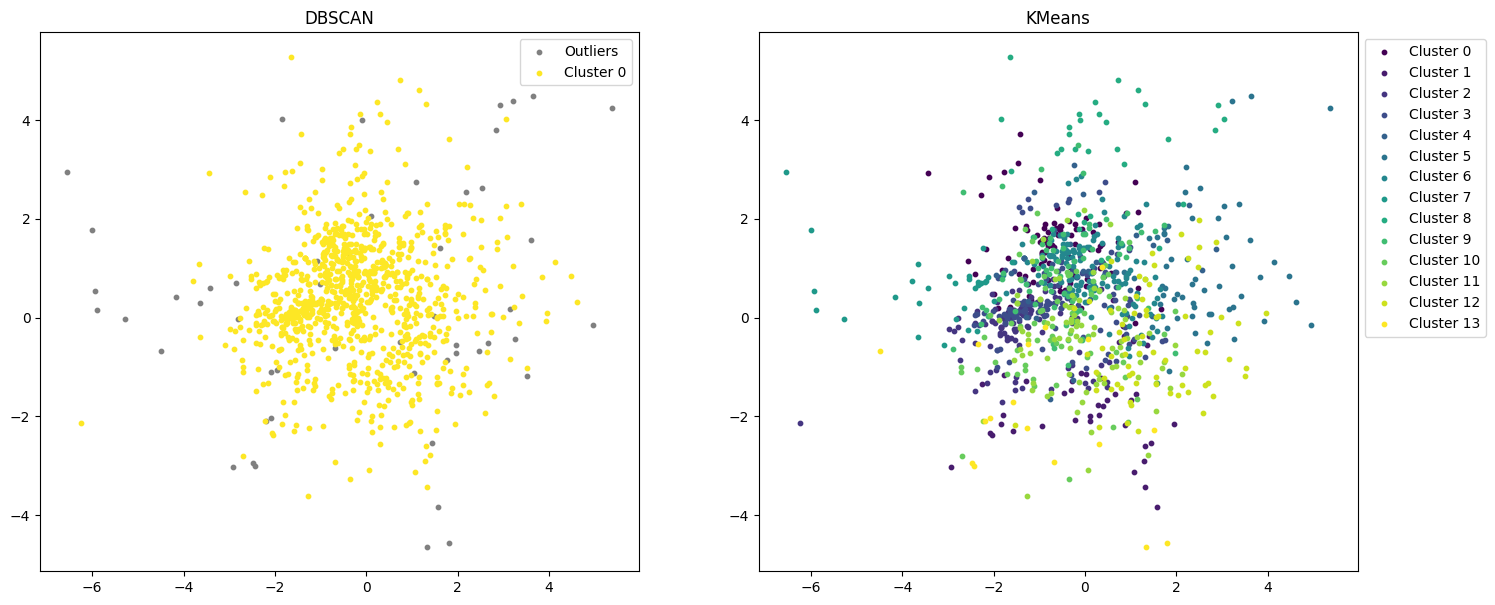

In [205]:
fig, axs = plt.subplots(1, 2, figsize=(17, 7))

unique_db_labels = np.unique(best_dbscan.labels_)
colors_db = plt.cm.viridis(np.linspace(0, 1, len(unique_db_labels)))

for i, label in enumerate(unique_db_labels):
    mask = (best_dbscan.labels_ == label)
    if label == -1:
        axs[0].scatter(x_pca_reduced_sample[mask, 0], x_pca_reduced_sample[mask, 1], c='gray', label='Outliers', s=10)
    else:
        axs[0].scatter(x_pca_reduced_sample[mask, 0], x_pca_reduced_sample[mask, 1], c=[colors_db[i]], label=f'Cluster {label}', s=10)

axs[0].set_title("DBSCAN")
axs[0].legend(loc='best')
unique_km_labels = np.unique(kmeans_standerd.labels_)
colors_km = plt.cm.viridis(np.linspace(0, 1, len(unique_km_labels)))

for i, label in enumerate(unique_km_labels):
    mask = (kmeans_standerd.labels_ == label)
    axs[1].scatter(x_pca_reduced_sample[mask, 0], x_pca_reduced_sample[mask, 1], c=[colors_km[i]], label=f'Cluster {label}', s=10)

axs[1].set_title("KMeans")
axs[1].legend(loc='best', bbox_to_anchor=(1, 1))





plt.show()

##Anomaly detection

In [226]:
x_sampled=x_pca_reduced_sample[:1000]

In [229]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [230]:
iso=IsolationForest( contamination=0.1, random_state=42)
iso.fit(x_sampled)

IsolationForest(contamination=0.1, random_state=42)

In [231]:
anomaly_scores= iso.decision_function(x_sampled)
iso_predictions = iso.predict(x_sampled)


In [256]:
iso_labels = np.where(iso_predictions == -1, 1, 0)


In [232]:

x_sampled["anomaly_scores"]=anomaly_scores
x_sampled["anomaly"]=iso_predictions

In [233]:
x_sampled[["anomaly_scores","anomaly"]].head(10)

,anomaly_scores,anomaly
0,0.093139,1
1,0.111435,1
2,-0.043370,-1
3,0.069856,1
4,0.075652,1
5,0.102258,1
6,0.100883,1
7,-0.017211,-1
8,0.077970,1
9,0.105946,1


In [234]:
x_sampled['anomaly'].value_counts(normalize=True)


,proportion
anomaly,
1,0.9
-1,0.1


In [127]:
# def outliers_plot(data, outlier_method , xvar ,yvar , xaxis_limits=[0,1],yaxis_limits=[0,1] ):
#   print(f"Outlier Method: {outlier_method}")

#   method=f'{outlier_method}_anomaly '

#   print(f"Number of anomalous values {len(data[data['anomaly'] == -1])}")
#   print(f"Number of non anomalous values {len(data[data['anomaly'] == 1])}")
#   print(f"Total Number of Values: {len(data)}")

#   g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1, -1])
#   g.map(sns.scatterplot, xvar, yvar)
#   g.fig.suptitle(f'Outlier Method: {outlier_method}', y=1.10, fontweight='bold')
#   g.set(xlim=xaxis_limits, ylim=yaxis_limits)
#   axes = g.axes.flatten()
#   axes[0].set_title(f"Outliers\n{len(data[data['anomaly'] == -1])} points")
#   axes[1].set_title(f"Inliers\n{len(data[data['anomaly'] == 1])} points")
#   return g


In [128]:
# outliers_plot(x_scaled,"Isolation Forest","V1","V2",[-6,6],[-6,6])

In [235]:

svm = OneClassSVM(nu=0.1)
svm.fit(x_sampled)
svm_predict = svm.predict(x_sampled)

In [237]:
svm_predict=pd.DataFrame(svm_predict)

In [258]:
svm_labels = np.where(svm_predict == -1, 1, 0)


In [241]:
anom_index= np.where(svm_predict == -1)
values=x_sampled.iloc[anom_index]

In [259]:
y_sampled=y[:1000]
from sklearn.metrics import classification_report
report=classification_report(y_sampled,svm_labels )
print(report)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       998
           1       0.02      1.00      0.04         2

    accuracy                           0.90      1000
   macro avg       0.51      0.95      0.49      1000
weighted avg       1.00      0.90      0.95      1000



In [257]:
from sklearn.metrics import classification_report
report1=classification_report(y_sampled,iso_labels )
print(report1)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       998
           1       0.02      1.00      0.04         2

    accuracy                           0.90      1000
   macro avg       0.51      0.95      0.49      1000
weighted avg       1.00      0.90      0.95      1000



In [261]:
conf_forest = confusion_matrix(y_sampled, iso_labels)
print("\nIsolation Forest:\n",conf_forest )
conf_svm = confusion_matrix(y[:1000], svm_labels)
print("Confusion Matrix:\n",conf_svm )


Isolation Forest:
 [[900  98]
 [  0   2]]
Confusion Matrix:
 [[898 100]
 [  0   2]]


In [263]:
# prompt: make for me code show the better generlze between OneClassSVM and IsolationForest and make him short a few lines

print("Isolation Forest Classification Report:")
print(classification_report(y[:1000], iso_labels))

print("\nOneClassSVM Classification Report:")
print(classification_report(y[:1000], svm_labels))

print("\nIsolation Forest Confusion Matrix:\n", confusion_matrix(y[:1000], iso_labels))

print("\nOneClassSVM Confusion Matrix:\n", confusion_matrix(y[:1000], svm_labels))


Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       998
           1       0.02      1.00      0.04         2

    accuracy                           0.90      1000
   macro avg       0.51      0.95      0.49      1000
weighted avg       1.00      0.90      0.95      1000


OneClassSVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       998
           1       0.02      1.00      0.04         2

    accuracy                           0.90      1000
   macro avg       0.51      0.95      0.49      1000
weighted avg       1.00      0.90      0.95      1000


Isolation Forest Confusion Matrix:
 [[900  98]
 [  0   2]]

OneClassSVM Confusion Matrix:
 [[898 100]
 [  0   2]]


#Compare clustering performance with and without dimensionality reduction (PCA).

In [ ]:
score1 = silhouette_score(x_pca_reduced_sample, kmeans_standerd.labels_)
score = silhouette_score(x_scaled[:1000], kmeans_standerd.labels_)
print("Silhouette Score with PCA:", score1)
print("Silhouette Score without PCA:", score)

Silhouette Score with PCA: 0.08864324110031586
Silhouette Score without PCA: 0.0830234029844281


In [ ]:
start_time1 = time.time()
kmeans1 = KMeans(init='random',n_clusters=13, random_state=42)
kmeans1.fit(x_pca_reduced_sample)
end_time1 = time.time()
kmeans_time = end_time1 - start_time1


start_time = time.time()
kmeans = KMeans(init='random',n_clusters=13, random_state=42)
kmeans.fit(x_scaled[:10000])
end_time = time.time()
kmeans_time_without_pca = end_time - start_time


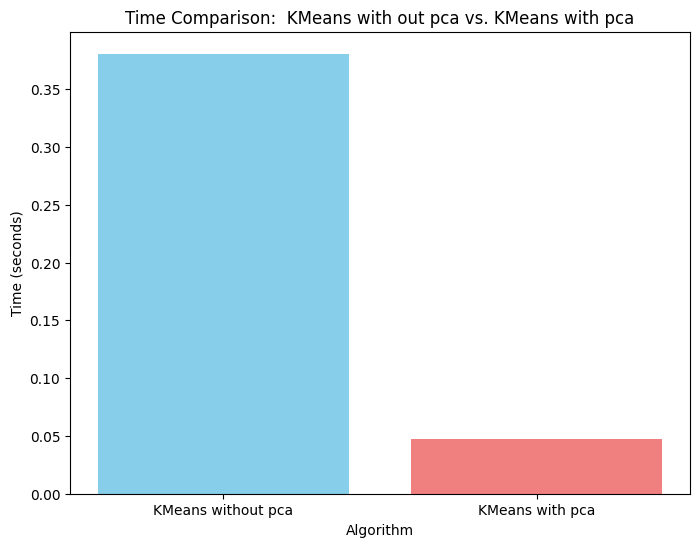

In [ ]:
algorithms = [ 'KMeans without pca','KMeans with pca']
times = [kmeans_time_without_pca, kmeans_time]
plt.figure(figsize=(8, 6))
plt.bar(algorithms, times, color=['skyblue', 'lightcoral'])
plt.xlabel('Algorithm')
plt.ylabel('Time (seconds)')
plt.title('Time Comparison:  KMeans with out pca vs. KMeans with pca')
plt.show()

# **comparison table**

In [ ]:
kmeans_inertia = kmeans_standerd.inertia_
minibatch_inertia = minikmeans.inertia_

kmeans_silhouette_score = silhouette_score(x_pca_reduced_sample, kmeans_standerd.labels_)
minibatch_silhouette_score = silhouette_score(x_pca_reduced_sample, minikmeans.labels_)

comparison_data = {
    'Metric': ['Inertia Value', 'Silhouette Score', 'Execution Time (seconds)', 'Number of Clusters Found'],
    'KMeans': [kmeans_inertia, kmeans_silhouette_score, kmeans_time, 'N/A'],
    'MiniBatchKMeans': [minibatch_inertia, minibatch_silhouette_score, mini_batch_time, 'N/A'],
    'DBSCAN': ['N/A', silhouette, 'N/A', label_counts]
}

comparison_table = pd.DataFrame(comparison_data)

print("Clustering Algorithm Comparison Table:")
print(comparison_table.to_markdown(index=False, floatfmt=".4f"))


Clustering Algorithm Comparison Table:
| Metric                   | KMeans               | MiniBatchKMeans      | DBSCAN                    |
|:-------------------------|:---------------------|:---------------------|:--------------------------|
| Inertia Value            | 14971.46806982646    | 18195.546011057253   | N/A                       |
| Silhouette Score         | 0.08864324110031586  | 0.07251447858415706  | 0.29165736618318816       |
| Execution Time (seconds) | 0.047634124755859375 | 0.055455923080444336 | N/A                       |
| Number of Clusters Found | N/A                  | N/A                  | -1     62                 |
|                          |                      |                      |  0    938                 |
|                          |                      |                      | Name: count, dtype: int64 |
